# M-dist vs. Euclidean: 3-dim

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 8
# S = np.ones(m)
S = np.sqrt(2)**np.arange(m)
k = 3
B, V, S = create_3d_hyper_module(m, scale=S)






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


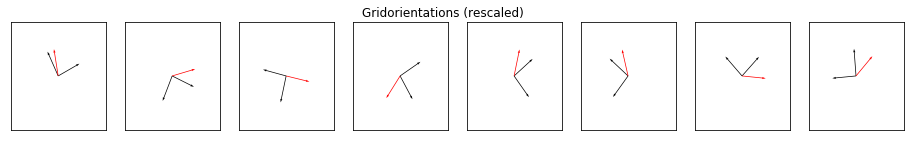

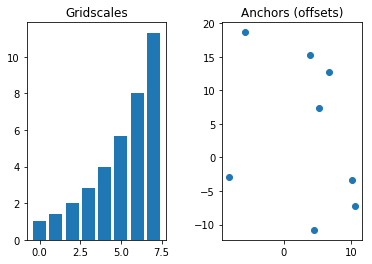

In [24]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Gridorientations (rescaled)")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = B[i,0,:] / S[i]
    r2 = B[i,1,:] / S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    ax[i].quiver(0.0,0.0,r1[2],r2[2], angles='xy', scale_units='xy', scale=1, color="red")

plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()



fig, ax = plt.subplots(1, 2);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax[0].set_title("Gridscales")
ax[0].bar(range(m), S)

ax[1].set_title("Anchors (offsets)")
ax[1].scatter(V[:,0], V[:,1])

plt.savefig("media/summary/{}d_scales_m{}.pdf".format(k,m), dpi=150)
plt.show()


In [34]:


T = 100000

X  = np.random.multivariate_normal(mean=np.zeros(k), cov=10.*np.eye(k), size=T)
X  = np.concatenate( [X ,np.random.multivariate_normal(mean=np.zeros(k), cov=100.*np.eye(k), size=T)], axis=0)

X_ = np.random.multivariate_normal(mean=np.zeros(k), cov=10.*np.eye(k), size=T)
X_  = np.concatenate( [X_ ,np.random.multivariate_normal(mean=np.zeros(k), cov=100.*np.eye(k), size=T)], axis=0)


Q  = map_3d_to_hypertorus(B, V, X )
Q_ = map_3d_to_hypertorus(B, V, X_)    
   
print Q.shape




(200000, 8, 2)


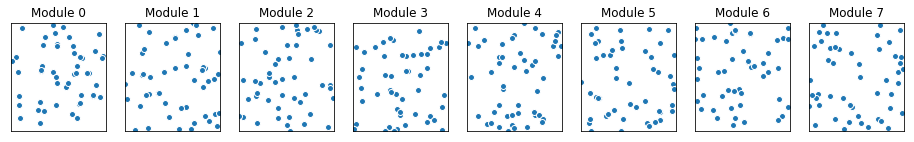

In [35]:



fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])


    ax[i].scatter(Q[:50,i,0],Q[:50,i,1], edgecolor='white')
    ax[i].set_title("Module {}".format(i))

plt.show()


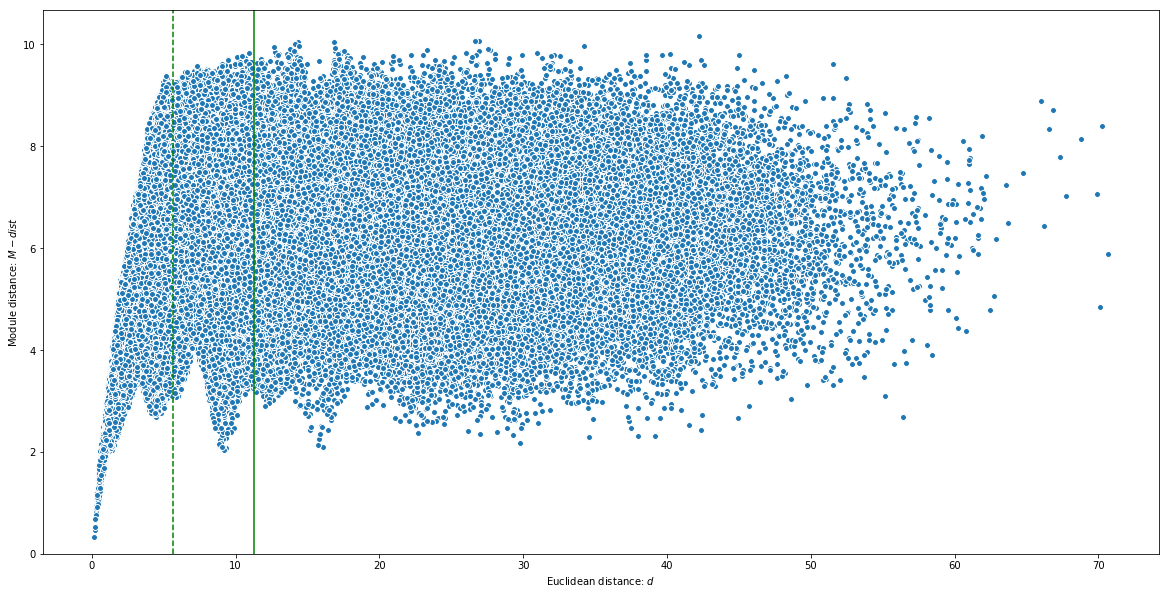

In [36]:

md = M_dist(Q, Q_, S=S)
ed = np.linalg.norm(X - X_,  axis=1)

mdc = M_dist_comp(Q, Q_, S=S)
mu  = np.mean(mdc, axis=1)
var = np.var(mdc, axis=1)
C = var

plt.figure(figsize=(20,10));

plt.scatter(ed, md, marker="o", alpha=1., edgecolors="white", c=None);
# plt.colorbar()
plt.ylim(0.)
plt.axvline(S[-1]/2., linestyle='--', color="green")
plt.axvline(S[-1], linestyle='-', color="green")
plt.xlabel("Euclidean distance: $d$");
plt.ylabel("Module distance: $M-dist$");

plt.savefig("media/summary/{}d_scatter_m{}.png".format(k,m), dpi=150)
plt.show()

